In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'soglia_diodo_decrescente.csv'

from interpolazione import RettaInterpolata, Interpolazione, final_val

In [2]:
fr = pd.read_csv(FILE)
I = np.array(fr['I(uA)']) * (10**-6)
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = np.array(fr['V'])
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

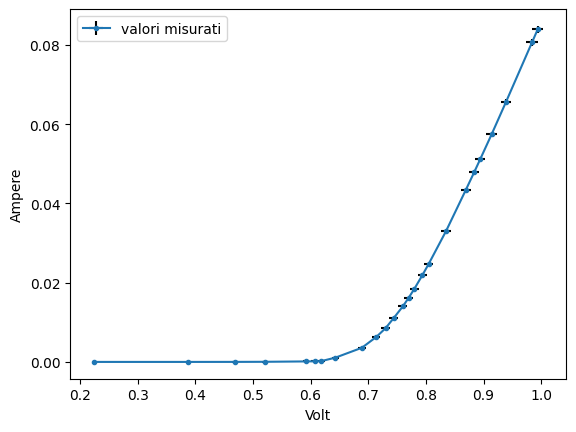

In [3]:
plt.title('')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',ecolor='black', label='valori misurati')
plt.xlabel('Volt')
plt.ylabel('Ampere')
# plt.yscale('log')
plt.legend()
plt.show()

### Valore di sogliola

$
X_s = -\frac{A}{B}
$

$
\sigma_{X_s} = \sqrt{\left(\frac{\partial X_s}{\partial A}\right)^2\sigma_A^2 + \left(\frac{\partial X_s}{\partial B}\right)^2\sigma_B^2}
$

$
\frac{\partial X_s}{\partial A} = -\frac{1}{B} \quad \frac{\partial X_s}{\partial B} = \frac{A}{B^2}
$

$
\sigma_{X_s} = \sqrt{\frac{\sigma_A^2}{B^2} + \frac{A^2}{B^4}\sigma_B^2}
$

3.1048926396004752
Valore di sogliola:  0.734 ± 0.013 V


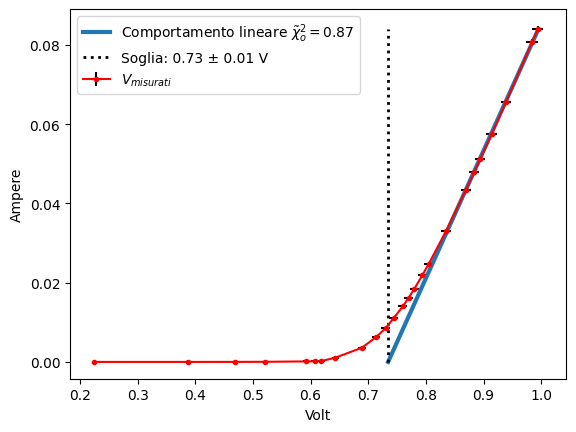


linearità A + BX
    
A: -0.2365304916486405 
B: 0.3220723277983215
sigmaA: 0.003330319254953677
sigmaB: 0.0036373351271087235

sigmaY: [0.0008395  0.00080623 0.0006563  0.00057443 0.00051095 0.0004795
 0.0004334  0.0003304 ]    
chiquadro ridotto: 0.87
df: 6
pvalue: 99.0%


In [4]:
N = 8
r = RettaInterpolata(V[:N],I[:N],sigmaI[:N])

plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,color='red',marker='.',ecolor='black', label='$V_{misurati}$')
# plt.plot(i.x_best,i.y_best, color='palegreen',label='fit')

y = np.linspace(0,I[0],100)
x = (y-r.A)/r.B

print(1/r.B)

# VALORE DI SOGLIOLA
sa,sb = r.sigmaA,r.sigmaB
A,B = r.A,r.B
sogliola = -A/B
ss = np.sqrt(sa**2/B**2 + (A**2/B**4) * sb**2)
print('Valore di sogliola: ',final_val(sogliola,ss,decimals=3,udm='V'))

plt.plot(x,y, label='Comportamento lineare $\\tilde{\chi}_o^2 = 0.87$',linewidth=3)

plt.vlines(x=sogliola,ymax=max(I),ymin=0,linewidths=2.0,label="Soglia: 0.73 ± 0.01 V", \
    color='black',linestyle="dotted")

plt.legend()
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.show()

print(r)

# TENTATIVI PER FAR FUNZIONARE IL FIT DEL DIODO

### FALLIMENTO:

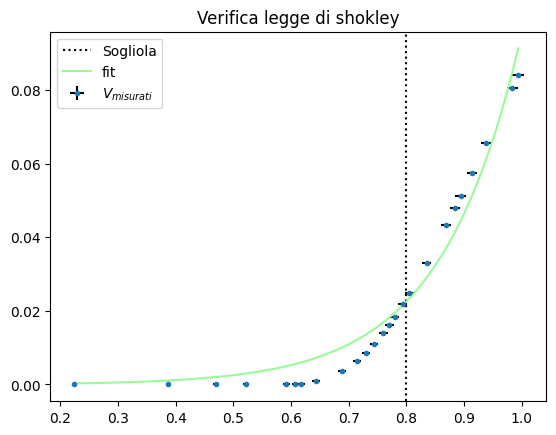

   
Parameters: [7.10849663e-05 5.36662425e+00] 
Sigma parameters: [2.80626050e-05 3.13624125e-01]

sigmaY: [1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
 1.e-04 1.e-04 1.e-04 1.e-04 1.e-05 1.e-05 1.e-05 1.e-05 1.e-06 1.e-06
 1.e-06 1.e-07 1.e-08 1.e-08 1.e-08]

chiquadro ridotto: 2330417197.69
df: 23
pvalue: 0.0%
covariance matrix: [[6.66548294e-10 7.42743735e-06]
 [7.42743735e-06 8.32519814e-02]]    



In [21]:
def shokley_reale(V,I0,g):
    q = 1.60 * (10**-19)
    k = 1.38 * (10**-23)
    T = 300
    
    return (I0 * (np.exp(q*V / (g * k * T)) - 1))
    

i = Interpolazione(V,I,shokley_reale,sigmaI,p0=[2.92156490e-10,1.63])

plt.title('Verifica legge di shokley')
plt.axvline(x=sogliola, color='black', linestyle='dotted', label='Sogliola')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',linestyle='None',ecolor='black', label='$V_{misurati}$')
plt.plot(i.x_best,i.y_best, color='palegreen',label='fit')
plt.legend()
plt.show()
print(i)

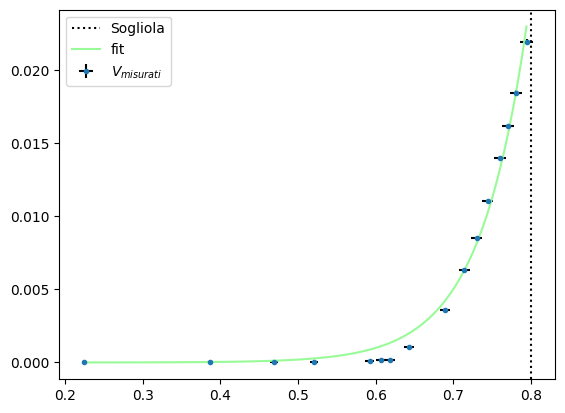

   
Parameters: [6.09563697e-08 2.38979712e+00] 
Sigma parameters: [3.91832467e-08 1.22863720e-01]

sigmaY: [2.1925e-04 1.8460e-04 1.6165e-04 1.4020e-04 1.1045e-04 8.5090e-05
 6.3120e-05 3.5800e-05 1.0800e-05 1.9000e-06 1.6100e-06 1.2700e-06
 3.1380e-07 8.1300e-08 7.7000e-09 1.0000e-10]

chiquadro ridotto: 36322037.27
df: 14
pvalue: 0.0%
covariance matrix: [[1.17548460e-15 3.68398032e-09]
 [3.68398032e-09 1.15574873e-02]]    



In [15]:
sogliola = sogliola

# VALUTAZIONE AL DI SOTTO DEL VALORE DI SOGLIA
Vd = V[np.where(V < sogliola)]
Id = I[np.where(V < sogliola)]
sId = sigmaI[np.where(V < sogliola)]
sVd = sigmaV[np.where(V < sogliola)]


def shokley(V,I0,g):
    q = 1.60 * (10**-19)
    k = 1.38 * (10**-23)
    T = 300
    return (I0 * (np.exp(q*V / (g * k * T)) - 1))

i = Interpolazione(Vd,Id,shokley,sId,p0=[2.92156490e-10,1.63])

plt.axvline(x=sogliola, color='black', linestyle='dotted', label='Sogliola')
# plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',linestyle='None',ecolor='black', label='$V_{misurati}$')
plt.errorbar(Vd,Id,yerr=sId,xerr=sVd,marker='.',linestyle='None',ecolor='black', label='$V_{misurati}$')

plt.plot(i.x_best,i.y_best, color='palegreen',label='fit')

x = np.linspace(min(V),max(V),100)
# plt.plot(x,shokley(x,*i.bval))
plt.legend()
plt.show()
print(i)

ancora


   
Parameters: [2.67482444e-04 5.82023450e+00] 
Sigma parameters: [1.03737867e-04 4.11011167e-01]

sigmaY: [0.00997539 0.00987297 0.00941291 0.00915803 0.00895459 0.00885299
 0.0087008  0.00835653 0.00805381 0.00794303]

chiquadro ridotto: 0.14
df: 8
pvalue: 100.0%
covariance matrix: [[ 6.88738888e-09 -2.72388689e-05]
 [-2.72388689e-05  1.08115315e-01]]    



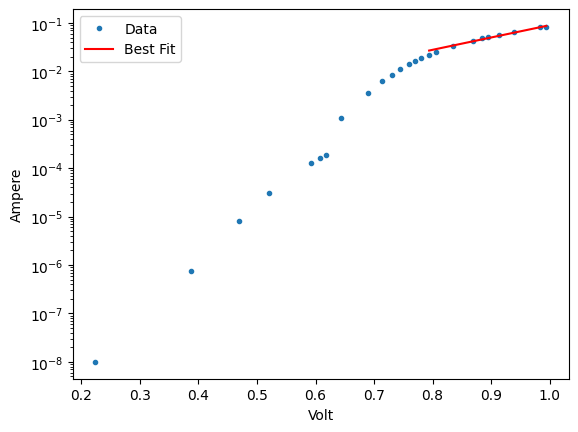

In [ ]:
# FIXME: fit non funzionante
def f(V,I0,coeff):
    return (I0 * (np.exp(coeff*V) - 1))

k = 10
sigma = np.sqrt(sigmaI**2 + sigmaV**2)
i = Interpolazione(V[:k],I[:k],f,sigma[:k],p0=[0.00001,0.05])
# i = RettaInterpolata(V,np.log(I),np.log(sigmaI))
print(i)

plt.plot(V, I, marker='.', linestyle='None', label='Data')
plt.plot(i.x_best, i.y_best, color='red', label='Best Fit')
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.yscale('log')
plt.legend()
plt.show()

# NEW FILE

In [16]:
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'soglia_diodo_decrescente_errori.csv'

fr = pd.read_csv(FILE)
I = np.array(fr['I(uA)']) * (10**-6)

sigmaI = np.array(fr['sI (uA)']) * (10**-6)

V = np.array(fr['V'])
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

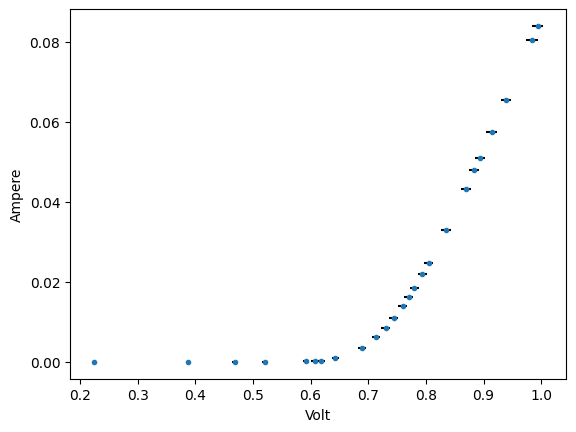

In [17]:
plt.errorbar(V, I, yerr=sigmaI, xerr=sigmaV, marker='.', linestyle='None', ecolor='black')
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.show()
